In [ ]:
#Loading Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 
from keras.datasets import mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data 
path = r"D:/Nam4/ComputerVision/Project/Sudoku/Digits" 
data = os.listdir(path)
data_X = []  #ảnh từ 0-9
data_y = []  #label
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(path +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(path +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(28,28))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


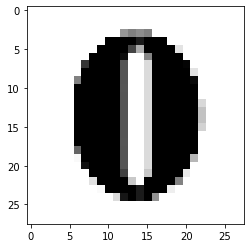

In [ ]:
plt.imshow(data_X[0])

In [ ]:
# Preprocessing the images for neuralnet

def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #tăng độ tương phản
    img = img/255 #normalizing
    return img

In [ ]:
#Spliting the train validation and test sets

train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 28, 28, 3)
Validation Set Shape =  (1931, 28, 28, 3)
Test Set Shape =  (508, 28, 28, 3)


In [ ]:
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Tăng dữ liệu
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [ ]:
# One hot encoding of the labels
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [ ]:
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 28, 28, 1)
Validation Set Shape =  (1931, 28, 28, 1)
Test Set Shape =  (508, 28, 28, 1)


In [ ]:
x_train = np.concatenate((x_train, train_X), axis=0)
x_test = np.concatenate((x_test, test_X), axis=0)
x_valid = np.concatenate((x_valid,  valid_X), axis=0)

y_valid = np.concatenate((y_valid, valid_y), axis=0)
y_train = np.concatenate((y_train, train_y), axis=0)
y_test = np.concatenate((y_test, test_y), axis=0)

In [ ]:
print("Training Set Shape = ",x_train.shape)
print("Validation Set Shape = ",x_test.shape)
print("Test Set Shape = ",x_valid.shape)

Training Set Shape =  (55721, 28, 28, 1)
Validation Set Shape =  (10508, 28, 28, 1)
Test Set Shape =  (13931, 28, 28, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(250, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32,
                    epochs = 50, validation_data = (x_valid, y_valid),
                    verbose = 2, steps_per_epoch= 200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/50
200/200 - 15s - loss: 0.5814 - accuracy: 0.8270 - val_loss: 0.2252 - val_accuracy: 0.9368 - 15s/epoch - 74ms/step
Epoch 2/50
200/200 - 2s - loss: 0.1752 - accuracy: 0.9456 - val_loss: 0.1326 - val_accuracy: 0.9594 - 2s/epoch - 8ms/step
Epoch 3/50
200/200 - 2s - loss: 0.1347 - accuracy: 0.9595 - val_loss: 0.1112 - val_accuracy: 0.9655 - 2s/epoch - 9ms/step
Epoch 4/50
200/200 - 2s - loss: 0.1259 - accuracy: 0.9638 - val_loss: 0.1099 - val_accuracy: 0.9656 - 2s/epoch - 8ms/step
Epoch 5/50
200/200 - 2s - loss: 0.1066 - accuracy: 0.9663 - val_loss: 0.1297 - val_accuracy: 0.9604 - 2s/epoch - 8ms/step
Epoch 6/50
200/200 - 2s - loss: 0.1075 - accuracy: 0.9630 - val_loss: 0.0875 - val_accuracy: 0.9734 - 2s/epoch - 8ms/step
Epoch 7/50
200/200 - 2s - loss: 0.0986 - accuracy: 0.9678 - val_loss: 0.0745 - val_accuracy: 0.9775 - 2s/epoch - 9ms/step
Epoch 8/50
200/200 - 2s - loss: 0.0942 - accuracy: 0.9703 - val_loss: 0.0727 - val_accuracy: 0.9783 - 2s/epoch - 10ms/step
Epoch 9/50
200/200 -

In [ ]:
model.save('classify_ver3.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

Test Score =  0.03726521134376526
Test Accuracy = 0.9894366264343262


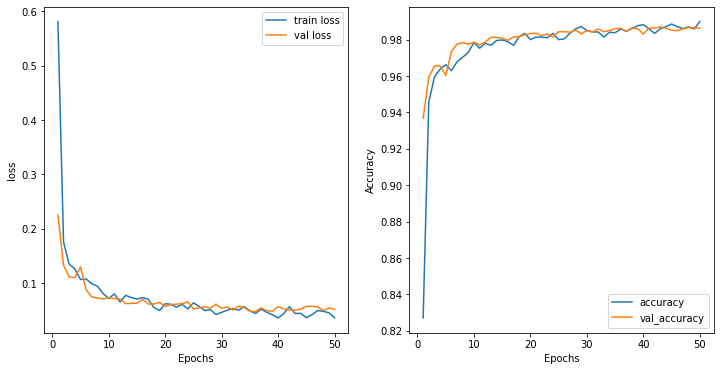

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,6)
e = [i for i in range(1, 51)]
ax[0].plot(e, history.history['loss'], label='train loss')
ax[0].plot(e, history.history['val_loss'], label='val loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")

ax[1].plot(e, history.history['accuracy'], label='accuracy')
ax[1].plot(e, history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.show()

In [ ]:
(a, b), (c, d) = mnist.load_data()

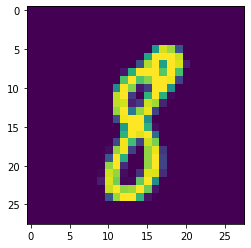

In [ ]:
plt.imshow(a[300])

In [ ]:
te = cv2.resize(a[300], (28, 28))
te = te/255
te = te.reshape(1, 28, 28 , 1)
model.predict(te)

array([[2.6392584e-09, 5.0921480e-09, 5.8020757e-09, 2.7640075e-07,
        1.2035654e-09, 3.5909917e-08, 8.1574623e-09, 2.6256250e-10,
        9.9999964e-01, 5.2979082e-08]], dtype=float32)